In [2]:
# Functions needed for the code

# function to remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# function to tokenize and lemmatize text
def clean_review_text(text):
    tokenz = word_tokenize(text)
    tokenz = [lemmatizer.lemmatize(token.lower()) for token in tokenz if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokenz)

# define a function to perform sentiment analysis
def get_sentiment(text):
    if isinstance(text, float):  # handle missing or null values
        return 0.0  # set sentiment to 0.0
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [5]:
# load the dataset
merged_df = pd.read_csv('/content/covid19_tweets - covid19_tweets.csv')

# replace missing or null values with an empty string
merged_df['user_location'].fillna('', inplace=True)
merged_df['date'].fillna('', inplace=True)

# apply the sentiment analysis function to the review body column
merged_df['sentiment'] = merged_df['user_location'].apply(get_sentiment) + merged_df['date'].apply(get_sentiment)

# print the dataframe head
print(merged_df.head(10))

                           user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ                  astroworld   
1                      Tom Basile 🇺🇸                New York, NY   
2                    Time4fisticuffs            Pewee Valley, KY   
3                        ethel mertz         Stuck in the Middle   
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                               
8                  Prathamesh Bendre                               
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...   2017-05-26 5:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catho

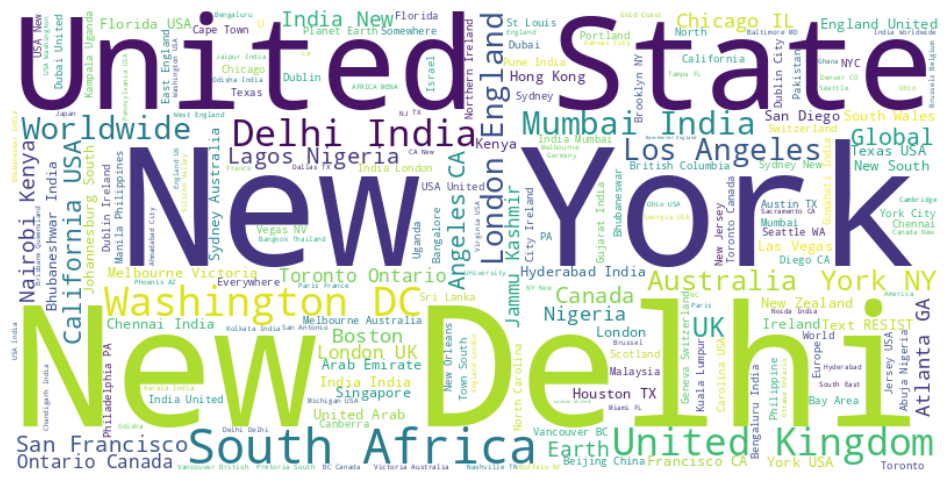

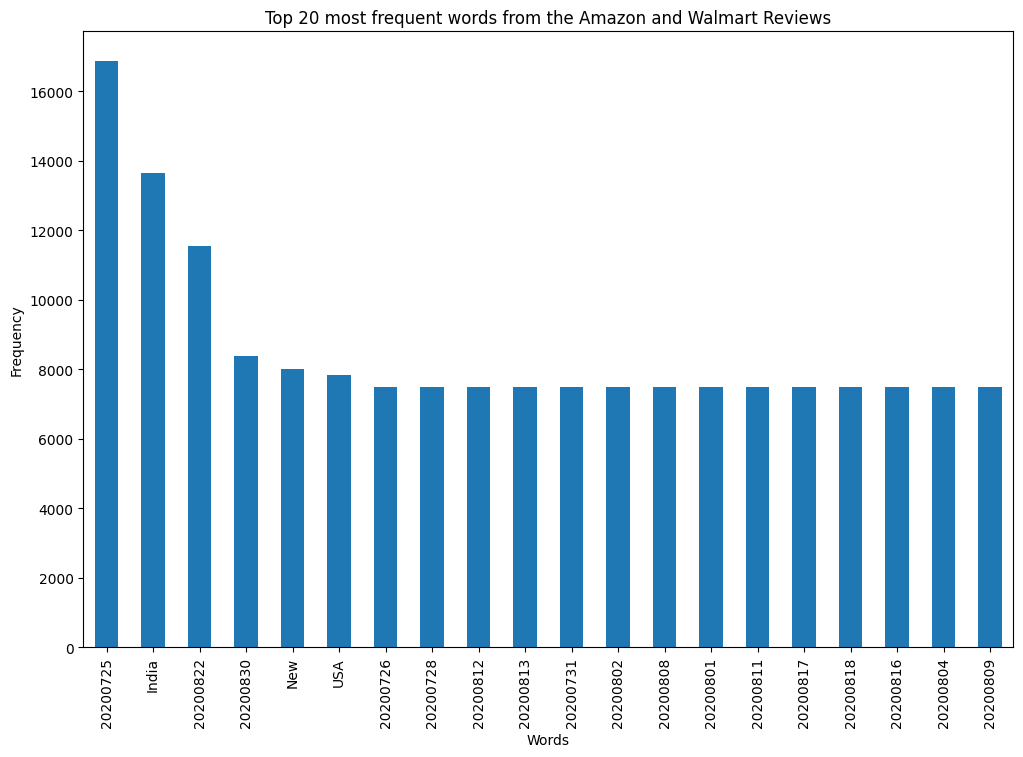

In [6]:
# Using Covid 19 tweets into one column and cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['user_location'] + ' ' + merged_df['date']

# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19 tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

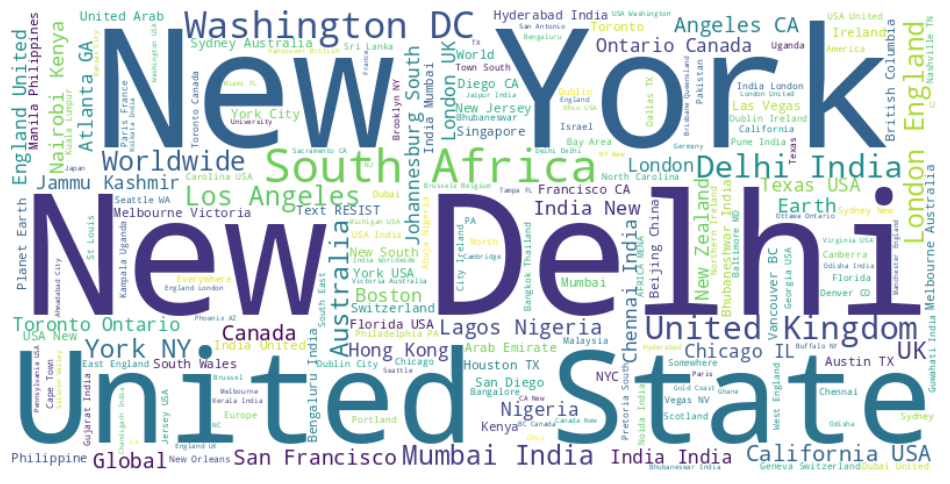

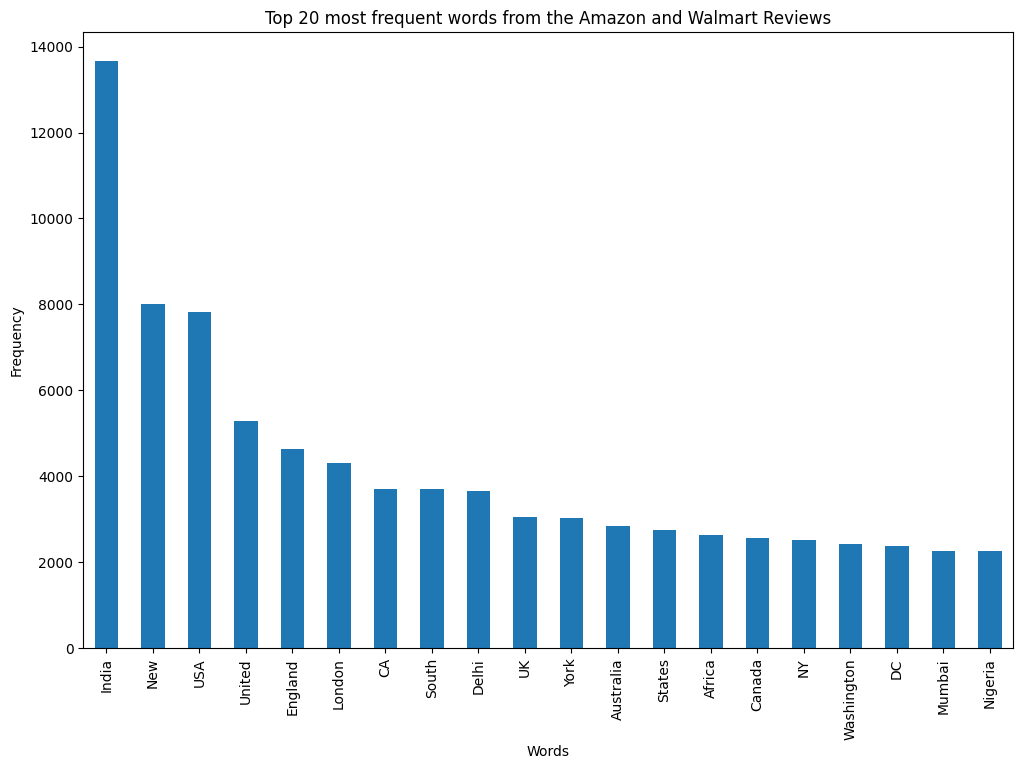

In [7]:
# Using Covid 19 tweets into one column and cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['user_location'] 
# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

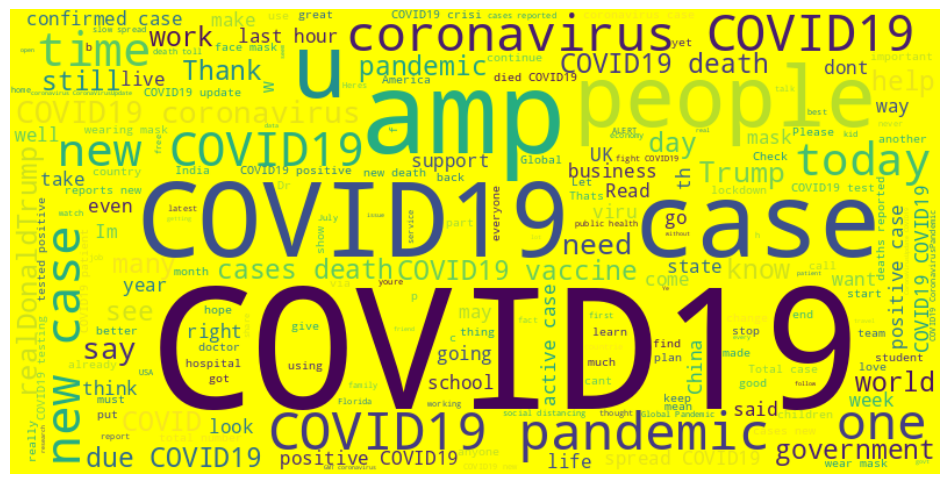

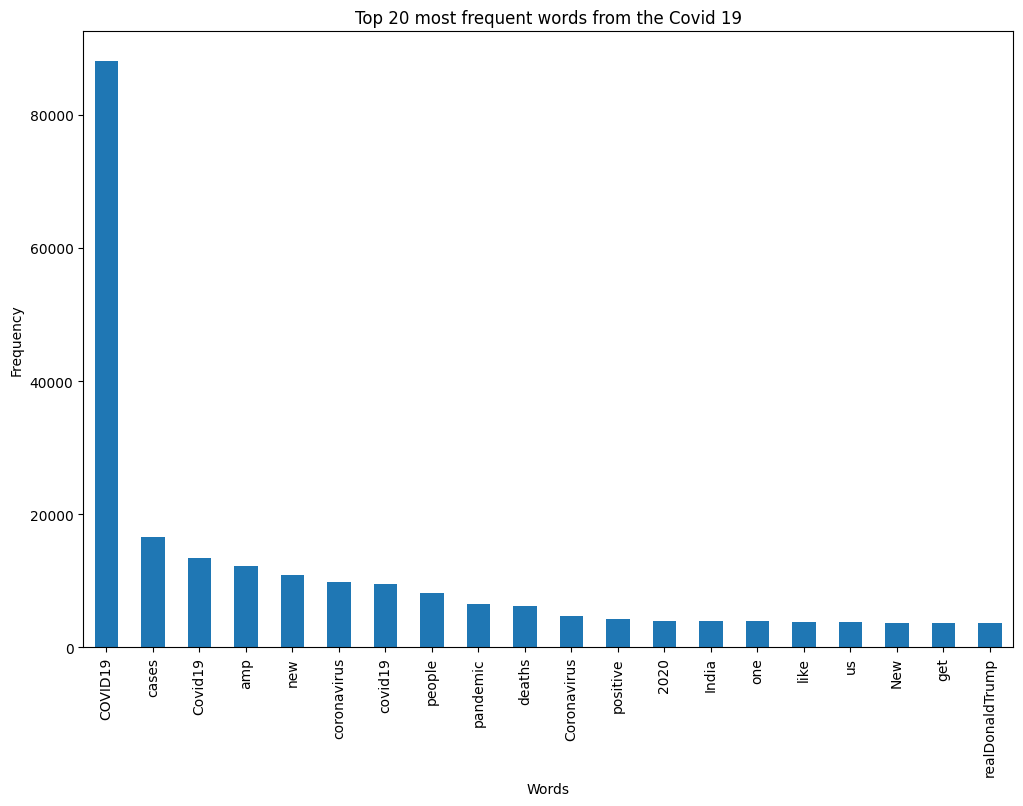

In [14]:
# cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['text'] 
# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='Yellow').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

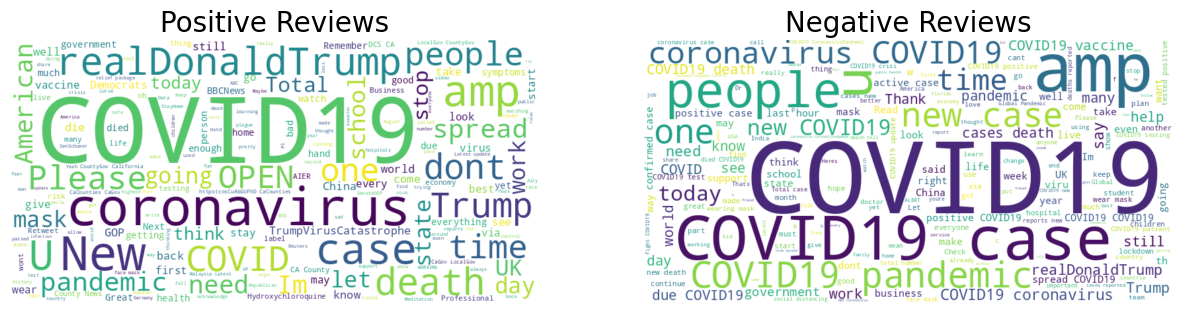

In [9]:
# Wordclouds for positive and negative keywords

# Create separate dataframes for positive and negative reviews
positive_df = merged_df[merged_df['sentiment'] > 0.5]
negative_df = merged_df[merged_df['sentiment'] < 0.5]

# Combine all the reviews into a single string for each dataframe
positive_text = " ".join(review for review in positive_df['cleaned_review_body'])
negative_text = " ".join(review for review in negative_df['cleaned_review_body'])

# Generate wordclouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the wordclouds
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive Reviews', fontsize=20)
axs[0].axis('off')
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative Reviews', fontsize=20)
axs[1].axis('off')
plt.show()

Classification Report for Sentiment Analysis:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     52125
           1       0.33      0.19      0.24      1608

    accuracy                           0.96     53733
   macro avg       0.65      0.59      0.61     53733
weighted avg       0.96      0.96      0.96     53733



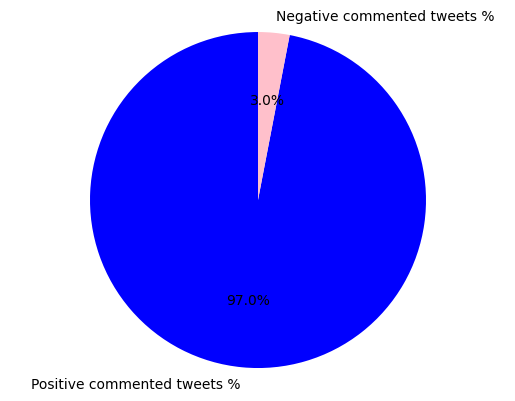

In [13]:
# 1st Method: Bad Review finder using Naive Bayes Classifier ML Model based on star_rating
# Cleaning text
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(clean_review_text)

# Generating average_star_rating based on both Amazon and Walmart Ratings
merged_df['star_rating'] = merged_df['user_friends'] 

# defining good/bad products based on star_rating
merged_df['is_bad_product'] = merged_df['star_rating'].apply(lambda x: 1 if x < 2.5 else 0)

# vectorize cleaned_review_body
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_df['cleaned_review_body'])
y = merged_df['is_bad_product']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# prediction on test dataset
y_pred = nb_classifier.predict(X_test)

# Classification report
print("Classification Report for Sentiment Analysis:", classification_report(y_test, y_pred))

good_count = len(merged_df[merged_df['is_bad_product'] == 0])
bad_count = len(merged_df[merged_df['is_bad_product'] == 1])

# Visualize the percentage of Good vs Bad product reviews
labels = ['Positive commented tweets %', 'Negative commented tweets %']
sizes = [good_count, bad_count]
colors = ['Blue', 'Pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
print("\n")